In [7]:
!pip install paddleocr
!pip install ultralytics opencv-python-headless
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.3 MB/s eta 0:00:00:00:01
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=b7656277a482f3968b51c8c4da5ee7a539aa6ea3438b40906df30312cdcbe1a5
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 17.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 13.0 MB/s eta 0:00:0000:0100:01


In [8]:
import os
import torch
import torch.utils.checkpoint
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr
import numpy as np
from PIL import Image


In [3]:
model = YOLO('yolov8s.pt')

In [4]:
dataset_path='/kaggle/input/final-id-card-dataset/ID_CARD_TEXT.v1i.yolov8'

In [5]:
model = model.train(data = os.path.join(dataset_path, 'data.yaml'),epochs = 80)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/final-id-card-dataset/ID_CARD_TEXT.v1i.yolov8/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

100%|██████████| 755k/755k [00:00<00:00, 19.5MB/s]
2024-08-29 16:32:16,475	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-29 16:32:17,380	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/final-id-card-dataset/ID_CARD_TEXT.v1i.yolov8/train/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 294.26it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/final-id-card-dataset/ID_CARD_TEXT.v1i.yolov8/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/final-id-card-dataset/ID_CARD_TEXT.v1i.yolov8/train/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 899.19it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/final-id-card-dataset/ID_CARD_TEXT.v1i.yolov8/train is not writeable, cache not saved.


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train7
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      4.81G      2.626      3.821      1.744        361        640: 100%|██████████| 5/5 [00:10<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


                   all         75       1707     0.0129       0.17    0.00763    0.00261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      4.68G      1.994      2.231      1.433        383        640: 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         75       1707       0.56      0.756      0.598      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      4.53G      1.489      1.099      1.133        299        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         75       1707      0.841      0.844      0.876      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      4.65G      1.425     0.9686       1.09        285        640: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         75       1707       0.88      0.888      0.914      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      4.73G      1.367     0.7883      1.043        422        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         75       1707      0.902       0.94      0.949      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      4.74G      1.403     0.7532      1.098        288        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         75       1707      0.933       0.94      0.969      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      4.75G      1.344     0.7372      1.059        312        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         75       1707      0.931      0.948      0.975        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      4.67G      1.362     0.6916      1.045        379        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         75       1707       0.87      0.937      0.921      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      4.75G      1.289     0.6542      1.035        458        640: 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         75       1707      0.932      0.963       0.97      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      4.75G      1.282     0.6313      1.036        436        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         75       1707      0.974      0.969      0.982      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      4.76G      1.281      0.644      1.036        416        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         75       1707      0.938      0.934      0.968      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      4.76G      1.278     0.6574       1.04        308        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         75       1707      0.907      0.925       0.96      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      4.72G       1.25     0.6312      1.037        355        640: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         75       1707      0.918      0.937      0.958      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      4.74G      1.265      0.637      1.051        321        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         75       1707      0.956      0.959       0.98      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      4.78G      1.262     0.6192      1.026        394        640: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         75       1707      0.971      0.983      0.988      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      4.67G      1.252     0.6029      1.037        289        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         75       1707      0.978      0.981      0.991      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      4.69G      1.273     0.6162      1.036        487        640: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75       1707      0.963      0.976      0.985      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80       4.6G       1.24     0.6005      1.031        397        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75       1707      0.957      0.956      0.985       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      4.75G      1.225     0.5921      1.025        343        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75       1707      0.944      0.954      0.981      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      4.75G      1.205     0.5822      1.016        407        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75       1707       0.92      0.929      0.973      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      4.67G      1.219     0.5818      1.015        387        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         75       1707      0.952      0.907      0.976      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      4.76G      1.184     0.5831      1.002        405        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         75       1707      0.946      0.948      0.981      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      4.76G      1.197     0.5796      1.013        416        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         75       1707      0.944      0.934      0.975      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      4.74G      1.208     0.5874      1.016        347        640: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75       1707       0.94       0.95       0.98      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      4.71G      1.182     0.5582      1.012        456        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         75       1707      0.957      0.931      0.981      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      4.74G      1.168     0.5629     0.9998        385        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75       1707      0.943      0.965      0.984      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      4.75G      1.206     0.5792      1.002        429        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         75       1707      0.962      0.974      0.986      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      4.76G       1.16     0.5563     0.9945        419        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         75       1707       0.97      0.983       0.99      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      4.73G      1.161     0.5848      1.001        325        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75       1707      0.978      0.982      0.993       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      4.78G      1.143     0.5718     0.9878        408        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75       1707      0.982      0.978      0.994      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      4.76G      1.155     0.5564      1.003        307        640: 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         75       1707      0.984      0.985      0.994      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      4.77G      1.162     0.5564     0.9974        331        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75       1707      0.993      0.993      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      4.71G      1.119     0.5525     0.9984        313        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75       1707      0.993      0.997      0.995       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      4.73G      1.091     0.5436     0.9982        216        640: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         75       1707      0.992      0.996      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      4.74G      1.127     0.5239      0.992        273        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         75       1707      0.992      0.994      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      4.79G      1.115     0.5304     0.9943        506        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75       1707      0.993      0.996      0.995      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      4.74G      1.083     0.5205     0.9734        323        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         75       1707      0.996      0.996      0.995      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      4.76G      1.067     0.5141     0.9691        475        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75       1707      0.996      0.996      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      4.79G      1.088     0.5141     0.9751        353        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         75       1707      0.996      0.997      0.995      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      4.79G      1.076     0.5116     0.9662        376        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75       1707      0.995      0.996      0.995      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      4.71G      1.045     0.5055     0.9534        412        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75       1707      0.995      0.995      0.995       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      4.59G      1.042     0.5109     0.9692        478        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         75       1707      0.996      0.996      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      4.74G      1.062     0.4984     0.9657        352        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         75       1707      0.988      0.996      0.995      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      4.76G      1.051     0.4979     0.9707        347        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         75       1707      0.984      0.994      0.993       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      4.72G      1.023     0.4892     0.9604        311        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         75       1707      0.988      0.994      0.994       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      4.73G      1.067     0.4939     0.9685        426        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         75       1707      0.988      0.996      0.994      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      4.74G      1.071     0.4896     0.9752        387        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         75       1707      0.992      0.993      0.994      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      4.64G      1.007     0.4777     0.9655        419        640: 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         75       1707      0.993      0.992      0.994       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      4.71G      1.024     0.4858     0.9598        417        640: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         75       1707       0.99      0.994      0.994      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      4.74G      1.007     0.4836     0.9572        342        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         75       1707      0.992      0.991      0.994      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      4.73G     0.9841     0.4697     0.9495        391        640: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         75       1707      0.991      0.992      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      4.73G     0.9944     0.4761     0.9594        471        640: 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         75       1707      0.996      0.996      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      4.71G     0.9722      0.457     0.9495        400        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         75       1707      0.995      0.998      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      4.68G      0.939     0.4466     0.9393        346        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         75       1707      0.999      0.996      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      4.76G     0.9227     0.4508     0.9236        393        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         75       1707      0.996      0.997      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      4.71G     0.9219     0.4411     0.9372        337        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75       1707      0.996      0.998      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      4.71G     0.9216     0.4456     0.9329        354        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75       1707      0.997      0.997      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      4.67G      0.932     0.4434     0.9376        397        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75       1707      0.995      0.998      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      4.76G     0.9492     0.4607     0.9466        347        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         75       1707      0.996      0.998      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      4.75G     0.9092     0.4351     0.9285        297        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75       1707      0.995      0.999      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80       4.7G     0.9042       0.44     0.9247        341        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         75       1707      0.996      0.999      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      4.69G     0.8695      0.422     0.9173        453        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         75       1707      0.996      0.998      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      4.66G      0.892     0.4302     0.9382        310        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75       1707      0.997      0.999      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      4.78G     0.8805     0.4308     0.9138        339        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         75       1707      0.998      0.999      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      4.57G     0.8661     0.4194      0.917        304        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75       1707      0.999      0.999      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      4.69G     0.8419     0.4147     0.9109        391        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75       1707      0.999      0.999      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      4.77G     0.8622     0.4169     0.9182        421        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         75       1707      0.999      0.999      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      4.74G     0.8447     0.4154     0.9151        366        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         75       1707      0.997      0.998      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      4.72G     0.8495     0.4072     0.9196        281        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75       1707      0.996      0.999      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      4.73G      0.833     0.4153      0.917        320        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         75       1707      0.996      0.999      0.995      0.823


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.59G     0.8231     0.4066     0.9067        243        640: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         75       1707      0.996      0.999      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      4.59G     0.7724     0.3848     0.9011        226        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         75       1707      0.997      0.998      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.39G     0.7575      0.378      0.881        248        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         75       1707      0.996      0.998      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.59G     0.7467     0.3716     0.8891        216        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75       1707      0.996      0.999      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      4.59G     0.7504     0.3771     0.8865        229        640: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75       1707      0.995      0.999      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.59G     0.7652     0.3785     0.8842        250        640: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]

                   all         75       1707      0.998      0.999      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      4.57G     0.7103     0.3637     0.8809        237        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         75       1707      0.998      0.999      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80       4.6G      0.743     0.3703     0.8856        233        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75       1707      0.998      0.999      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.58G      0.703     0.3636     0.8767        241        640: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         75       1707      0.998      0.999      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.59G     0.7045      0.361     0.8739        224        640: 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         75       1707      0.998      0.999      0.995      0.846



80 epochs completed in 0.084 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 22.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.16s/it]


                   all         75       1707      0.998      0.999      0.995      0.846
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train7


lr/pg0,▁▂▃▄▅▅▆▇▇████▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
lr/pg1,▁▂▃▄▅▅▆▇▇████▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
lr/pg2,▁▂▃▄▅▅▆▇▇████▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▇██████████████████████████████████████
metrics/mAP50-95(B),▁▅▅▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
metrics/precision(B),▁▇▇███▇█████████████████████████████████
metrics/recall(B),▁▇▇██▇▇███▇▇▇███████████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁


In [9]:
model = YOLO('/kaggle/working/runs/detect/train7/weights/best.pt')

In [10]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 473kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:11<00:00, 904kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 141kiB/s] 


[2024/08/30 06:17:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [11]:
def detect_and_recognize_text(image_path, model, ocr):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detect license plates
    results = model(image_path)
#     print(results,type(results))
    
    # Process the results
    for i, result in enumerate(results):
        boxes = result.boxes.xyxy.cpu().numpy()  # x1, y1, x2, y2
#         print(boxes,type(boxes))
        
        for j, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            cropped_image = image[y1:y2, x1:x2]
            
            # Check if the cropped image is valid
            if cropped_image.size == 0:
                print(f"Skipping empty cropped region at: ({x1}, {y1}), ({x2}, {y2})")
                continue
            
            # Enhance the cropped image
#             enhanced_image = enhance_image(cropped_image)
            
            # Recognize text using PaddleOCR
            ocr_result = ocr.ocr(cropped_image, cls=True)
            
#             # Display cropped image and OCR result
#             plt.figure(figsize=(10, 5))
#             plt.subplot(1, 2, 1)
#             plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
#             plt.title(f"Cropped Image {i+1}-{j+1}")
#             plt.axis('off')
            
            print(f"OCR result for cropped image {i+1}-{j+1}:")
            if ocr_result and ocr_result[0] is not None:
                for line in ocr_result:
                    if line is not None:
                        for word_info in line:
                            text = word_info[1][0]
                            confidence = word_info[1][1]
                            print(f"Text: {text}, Confidence: {confidence:.2f}")
                            
                            # Draw bounding box and recognized text on the original image
                            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
#                             cv2.putText(image, f"  {text}   ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            else:
                print("No text detected")
            print("\n")
    
    return image

In [12]:
import glob
import cv2

In [15]:
images = glob.glob("/kaggle/input/test-set-2-1/TEST_IDCARD/*")


image 1/1 /kaggle/input/test-set-2-1/TEST_IDCARD/1_17.jpg: 416x640 23 texts, 42.3ms
Speed: 9.0ms preprocess, 42.3ms inference, 252.9ms postprocess per image at shape (1, 3, 416, 640)
[2024/08/30 06:18:03] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07742547988891602
[2024/08/30 06:18:03] ppocr DEBUG: cls num  : 1, elapsed : 0.030892372131347656
[2024/08/30 06:18:03] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0768423080444336
OCR result for cropped image 1-1:
No text detected


[2024/08/30 06:18:03] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.047728776931762695
[2024/08/30 06:18:03] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/08/30 06:18:03] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06
OCR result for cropped image 1-2:
No text detected


[2024/08/30 06:18:03] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.043493032455444336
[2024/08/30 06:18:03] ppocr DEBUG: cls num  : 2, elapsed : 0.03096485137939453
[2024/08/30 06:18:03] ppocr DEBUG: rec_res num  : 2, elapsed : 0.205194

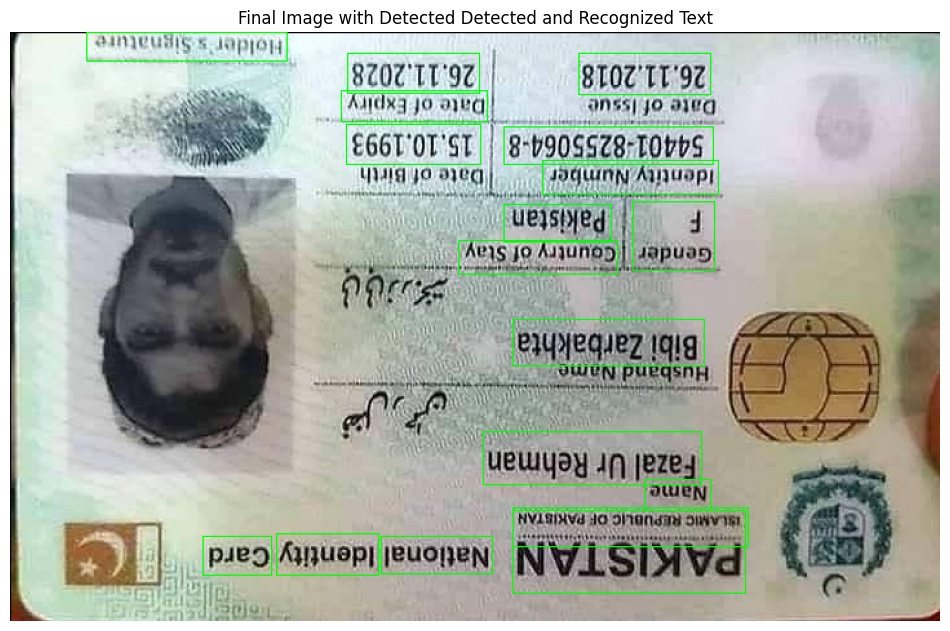


image 1/1 /kaggle/input/test-set-2-1/TEST_IDCARD/Shahahad_id_card.jpg: 448x640 24 texts, 46.9ms
Speed: 2.2ms preprocess, 46.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
[2024/08/30 06:18:06] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.05698418617248535
[2024/08/30 06:18:06] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/08/30 06:18:06] ppocr DEBUG: rec_res num  : 0, elapsed : 2.86102294921875e-06
OCR result for cropped image 1-1:
No text detected


[2024/08/30 06:18:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.032587528228759766
[2024/08/30 06:18:06] ppocr DEBUG: cls num  : 1, elapsed : 0.008979558944702148
[2024/08/30 06:18:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04982638359069824
OCR result for cropped image 1-2:
Text: Gender, Confidence: 0.99


[2024/08/30 06:18:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08349180221557617
[2024/08/30 06:18:06] ppocr DEBUG: cls num  : 1, elapsed : 0.008458852767944336
[2024/08/30 06:18:06] ppocr DEBUG: rec_res num  

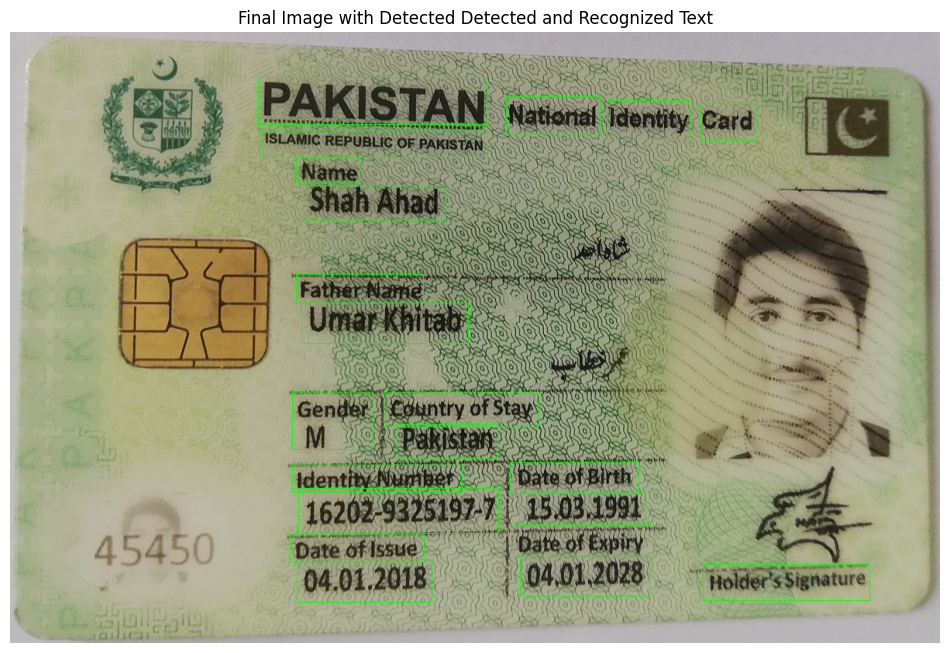

In [16]:
for i in images:
    output_image = detect_and_recognize_text(i, model, ocr)
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Final Image with Detected Detected and Recognized Text")
    plt.show()